In [1]:
#Importing dependencies 
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np
from datetime import datetime, date, time

In [2]:
#reading in files
df_crash_population = pd.read_csv('.\Resources\clean_crash_population.csv', low_memory=False)

In [3]:
# check dataframe
df_crash_population.head()

,Crash_ID,State,Crash_Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,...,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day,Quarter,Population_Month,Male,Female,All
0,20212045,Vic,6,2021,Monday,5:40:00,Single,No,No,No,...,No,No,26_to_39,Weekend,Night (12pm - 6am),Q2,6,3291572,3357587,6649159
1,20212082,Vic,6,2021,Sunday,14:00:00,Single,No,No,No,...,No,No,40_to_64,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159
2,20212079,Vic,6,2021,Saturday,13:25:00,Single,No,No,No,...,No,No,65_to_74,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159
3,20212111,Vic,6,2021,Thursday,16:50:00,Single,No,No,No,...,No,No,40_to_64,Weekday,Evening Commute (3pm - 7pm),Q2,6,3291572,3357587,6649159
4,20212149,Vic,6,2021,Wednesday,14:38:00,Multiple,No,No,No,...,No,No,17_to_25,Weekday,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159


In [4]:
#Create New data frame for clensing and analysis
#reading in files
df_genderageall = pd.read_csv('.\\Resources\clean_crash_population.csv', low_memory=False)
# Add column'Counter and add value to the column of 1
df_genderageall['Counter']= '1'
# check dataframe
df_genderageall

,Crash_ID,State,Crash_Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,Articulated_Truck_Involvement,...,Easter_Period,Age_Group,Day_of_week,Time_of_day,Quarter,Population_Month,Male,Female,All,Counter
0,20212045,Vic,6,2021,Monday,5:40:00,Single,No,No,No,...,No,26_to_39,Weekend,Night (12pm - 6am),Q2,6,3291572,3357587,6649159,1
1,20212082,Vic,6,2021,Sunday,14:00:00,Single,No,No,No,...,No,40_to_64,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159,1
2,20212079,Vic,6,2021,Saturday,13:25:00,Single,No,No,No,...,No,65_to_74,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159,1
3,20212111,Vic,6,2021,Thursday,16:50:00,Single,No,No,No,...,No,40_to_64,Weekday,Evening Commute (3pm - 7pm),Q2,6,3291572,3357587,6649159,1
4,20212149,Vic,6,2021,Wednesday,14:38:00,Multiple,No,No,No,...,No,17_to_25,Weekday,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,19897020,NT,3,1989,Saturday,2:16:00,Single,No,NaN,No,...,No,17_to_25,Weekend,Night (12pm - 6am),Q1,3,84763,76287,161050,1
52562,19897054,NT,2,1989,Saturday,18:00:00,Single,No,NaN,No,...,No,17_to_25,Weekend,Evening Commute (3pm - 7pm),Q1,3,84763,76287,161050,1
52563,19897054,NT,2,1989,Saturday,18:00:00,Single,No,NaN,No,...,No,17_to_25,Weekend,Evening Commute (3pm - 7pm),Q1,3,84763,76287,161050,1
52564,19897038,NT,1,1989,Saturday,23:30:00,Single,No,NaN,Yes,...,No,26_to_39,Weekend,Night (12pm - 6am),Q1,3,84763,76287,161050,1


In [5]:
# Save the all_age dataframe as a csv
df_genderageall.to_csv('.\\Resources\genderageall.csv', index = "False")

In [6]:
#reading in files
df_genderageall = pd.read_csv('.\\Resources\genderageall.csv', low_memory=False)

#Refine Dataframe
df_genderageall = df_genderageall[["Crash_ID", "Counter", "Year", "State", "Crash_Type", "Road_User", "Gender", "Age", "Age_Group"]]
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...
52561,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25
52562,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25
52563,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25
52564,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39


In [7]:
# Save the all_age dataframe as a csv
df_genderageall.to_csv('.\\Resources\genderageall.csv', index = "False")
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...
52561,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25
52562,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25
52563,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25
52564,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39


In [8]:
#reading in files
df_genderageall = pd.read_csv('.\\Resources\genderageall.csv', low_memory=False)

# Filter to remove observations that are not 'Male'or 'Female'
df_genderageall.Gender.unique()

array(['Male', 'Female', nan, 'Unspecified'], dtype=object)

In [9]:
# Filter to remove observations that are not 'Male'or 'Female'
df_genderageall_data_list = ['Male', 'Female']

In [10]:
# Filter to remove observations that are not 'Male'or 'Female'
df_genderageall_sv = df_genderageall[df_genderageall.Gender.isin(df_genderageall_data_list)]
df_genderageall_sv

,Unnamed: 0,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group
0,0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39
1,1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64
2,2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74
3,3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64
4,4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...
52561,52561,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25
52562,52562,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25
52563,52563,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25
52564,52564,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39


In [11]:
# Save the all_age dataframe as a csv
df_genderageall_sv.to_csv('.\\Resources\genderageall.csv', index = "False")

In [12]:
#reading in files
df_genderageall = pd.read_csv('.\\Resources\genderageall.csv', low_memory=False)

# Create new Age Groupings
conditions = [
    (df_genderageall['Age']>= 67),
    (df_genderageall['Age']>= 57) & (df_genderageall['Age']<= 66),
    (df_genderageall['Age']>= 47) & (df_genderageall['Age']<= 56),
    (df_genderageall['Age']>= 37) & (df_genderageall['Age']<= 46),
    (df_genderageall['Age']>= 27) & (df_genderageall['Age']<= 36),
    (df_genderageall['Age']>= 17) & (df_genderageall['Age']<= 26),
    (df_genderageall['Age']<= 16),
]
     
values = ['67+ Years', '57-66 Years', '47-56 Years', '37-46 Years', '27-36 Years', '17-26 Years', '<16 Years']

df_genderageall['Age_Category'] = np.select(conditions, values)
df_genderageall.head()

,Unnamed: 0,Unnamed: 0.1,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category
0,0,0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years
1,1,1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years
2,2,2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years
3,3,3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years
4,4,4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years


In [13]:
#Remove Unnamed: 0 Column
df_genderageall = df_genderageall.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
df_genderageall.head()

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years


In [14]:
# Save the all_age dataframe as a csv - cleanse complete
df_genderageall.to_csv('.\\Resources\genderageall.csv', index = "False")
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years
...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years


In [15]:
#Test Road_User types
df_genderageall.Road_User.unique()

array(['Driver', 'Motorcycle rider', 'Passenger', 'Pedal cyclist',
       'Pedestrian', 'Other/-9', 'Motorcycle pillion passenger'],
      dtype=object)

In [16]:
#Create Numerical fields for Gender
df_genderageall['Gender_rank'] = df_genderageall['Gender']
df_genderageall.Gender_rank.replace(['Male', 'Female'], [2, 1], inplace=True)
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2
...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1


In [17]:
#Create Numerical fields for Crash Type
df_genderageall['Crash_Type_rank'] = df_genderageall['Crash_Type']
df_genderageall.Crash_Type_rank.replace(['Single', 'Multiple'], [1, 2], inplace=True)
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1


In [18]:
# Identify different Road User Categories observied in dataset
df_genderageall.Road_User.unique()

array(['Driver', 'Motorcycle rider', 'Passenger', 'Pedal cyclist',
       'Pedestrian', 'Other/-9', 'Motorcycle pillion passenger'],
      dtype=object)

In [19]:
# Create a Data List of all category Types to be retained
df_genderageall_data_list = ['Driver', 'Motorcycle rider', 'Passenger', 'Pedal cyclist',
       'Pedestrian', 'Motorcycle pillion passenger']

In [20]:
# Filter to remove observations that are 'Other/-9'
df_genderageall_sv = df_genderageall[df_genderageall.Road_User.isin(df_genderageall_data_list)]
df_genderageall_sv

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1


In [21]:
# Save the genderageall dataframe as a csv - cleanse complete
df_genderageall_sv.to_csv('.\\Resources\genderageall.csv', index = "False")
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1


In [22]:
#Create Numerical fields for Road User Type
df_genderageall['Road_User_rank'] = df_genderageall['Road_User']
df_genderageall.Road_User_rank.replace(['Driver', 'Motorcycle rider', 'Pedal cyclist', 'Passenger', 'Pedestrian', 'Motorcycle pillion passenger'], [1, 2, 3, 4, 5, 6], inplace=True)
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank,Road_User_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1,2
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1,5
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1,4
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1,4


In [23]:
# Save the genderageall dataframe as a csv - cleanse complete
df_genderageall.to_csv('.\\Resources\genderageall.csv', index = "False")
df_genderageall

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank,Road_User_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1,2
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1,1
4,20212149,1,2021,Vic,Multiple,Driver,Male,25,17_to_25,17-26 Years,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1,5
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1,4
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1,4


In [24]:
#Create an all gender pivot table from the data
pivot1 = pd.pivot_table(df_genderageall, 
               values='Gender_rank',
               index=['Year'],
               columns=['Gender'],
               aggfunc='count'
              )
pivot1

Gender,Female,Male
Year,,
1989,815,1985
1990,697,1634
1991,629,1484
1992,625,1348
1993,560,1393
1994,589,1338
1995,604,1413
1996,564,1406
1997,561,1206


In [25]:
# Save Pivot1 table as CSV file
pivot1.to_csv('.\\Resources\genderpivot1ageall.csv', index = "False")
pivot1

Gender,Female,Male
Year,,
1989,815,1985
1990,697,1634
1991,629,1484
1992,625,1348
1993,560,1393
1994,589,1338
1995,604,1413
1996,564,1406
1997,561,1206


<AxesSubplot:xlabel='Year'>

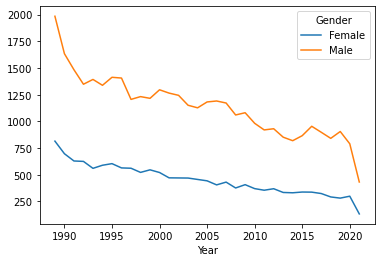

In [26]:
#Create an all gender line chart from the data

pivot1.plot(kind='line')

In [27]:
#Read Pivot1 csv and analyse observations
#reading in files
df_pivot1age = pd.read_csv('.\\Resources\genderpivot1ageall.csv', low_memory=False)
df_pivot1age.head()

,Year,Female,Male
0,1989,815,1985
1,1990,697,1634
2,1991,629,1484
3,1992,625,1348
4,1993,560,1393


In [28]:
#Add Total Column and columns to calculate percentage variance
df_pivot1age['Total'] = df_pivot1age['Female'] + df_pivot1age['Male']
df_pivot1age['Female%'] = (df_pivot1age['Female'] / df_pivot1age ['Total'])*100
df_pivot1age['Male%'] = (df_pivot1age['Male'] / df_pivot1age ['Total'])*100
df_pivot1age.head()

,Year,Female,Male,Total,Female%,Male%
0,1989,815,1985,2800,29.107143,70.892857
1,1990,697,1634,2331,29.901330,70.098670
2,1991,629,1484,2113,29.768102,70.231898
3,1992,625,1348,1973,31.677648,68.322352
4,1993,560,1393,1953,28.673835,71.326165


In [29]:
# Save Pivot1 table as CSV file
df_pivot1age.to_csv('.\\Resources\pivot1ageprop.csv', index = "False")
df_pivot1age.head()

,Year,Female,Male,Total,Female%,Male%
0,1989,815,1985,2800,29.107143,70.892857
1,1990,697,1634,2331,29.901330,70.098670
2,1991,629,1484,2113,29.768102,70.231898
3,1992,625,1348,1973,31.677648,68.322352
4,1993,560,1393,1953,28.673835,71.326165


In [30]:
#Read Pivot1age csv and analyse observations
#reading in files
df_pivot1prop = pd.read_csv('.\\Resources\pivot1ageprop.csv', low_memory=False)
df_pivot1age.head()

,Year,Female,Male,Total,Female%,Male%
0,1989,815,1985,2800,29.107143,70.892857
1,1990,697,1634,2331,29.901330,70.098670
2,1991,629,1484,2113,29.768102,70.231898
3,1992,625,1348,1973,31.677648,68.322352
4,1993,560,1393,1953,28.673835,71.326165


In [31]:
#Drop columns
df_pivot1age = df_pivot1age.drop(columns=['Female', 'Male', 'Total'])
df_pivot1age.head()

,Year,Female%,Male%
0,1989,29.107143,70.892857
1,1990,29.901330,70.098670
2,1991,29.768102,70.231898
3,1992,31.677648,68.322352
4,1993,28.673835,71.326165


[]

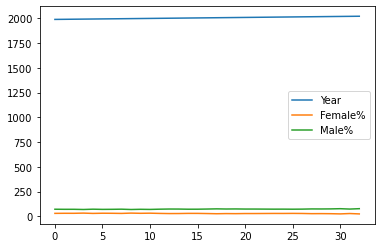

In [32]:
#Create an all gender line chart from the data

df_pivot1age.plot(kind='line').plot(kind='line')

In [33]:
#Read Pivot1age csv and analyse observations
#reading in files
df_pivot1prop = pd.read_csv('.\\Resources\pivot1ageprop.csv', low_memory=False)
df_pivot1age.head()

#Caonvert Table Columns to Rows Orientation
df_pivot1age_tr = df_pivot1age.transpose()
df_pivot1age_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Year,1989.000000,1990.00000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,...,2012.000000,2013.000000,2014.000000,2015.00000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
Female%,29.107143,29.90133,29.768102,31.677648,28.673835,30.565646,29.945464,28.629442,31.748727,29.760547,...,28.384615,28.161889,28.782609,28.07309,26.103796,26.513912,25.772286,23.693086,27.456382,23.539823
Male%,70.892857,70.09867,70.231898,68.322352,71.326165,69.434354,70.054536,71.370558,68.251273,70.239453,...,71.615385,71.838111,71.217391,71.92691,73.896204,73.486088,74.227714,76.306914,72.543618,76.460177


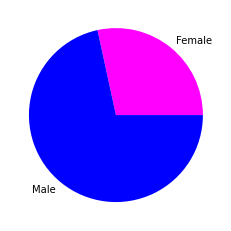

In [34]:
#Pot Pie chart comparing male & fenale observations over whole of population
female = df_genderageall.loc[df_genderageall['Gender'] == 'Female'].count()[0]
male = df_genderageall.loc[df_genderageall['Gender'] == 'Male'].count()[0]

labels = ["Female", "Male"]
colors = ["fuchsia", "blue"]

plt.pie([female, male], labels = labels, colors = colors)

plt.show()

In [35]:
#Filtering out Groups not equal to ['Single']
df_gender_filtered = df_genderageall
df_gender_filtered_data_list = ['Single']
df_gender_filtered_sv = df_gender_filtered[df_gender_filtered.Crash_Type.isin(df_gender_filtered_data_list)]
df_gender_filtered_sv

,Crash_ID,Counter,Year,State,Crash_Type,Road_User,Gender,Age,Age_Group,Age_Category,Gender_rank,Crash_Type_rank,Road_User_rank
0,20212045,1,2021,Vic,Single,Driver,Male,36,26_to_39,27-36 Years,2,1,1
1,20212082,1,2021,Vic,Single,Motorcycle rider,Male,63,40_to_64,57-66 Years,2,1,2
2,20212079,1,2021,Vic,Single,Driver,Female,67,65_to_74,67+ Years,1,1,1
3,20212111,1,2021,Vic,Single,Driver,Female,50,40_to_64,47-56 Years,1,1,1
5,20212023,1,2021,Vic,Single,Driver,Female,47,40_to_64,47-56 Years,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52533,19897020,1,1989,NT,Single,Pedestrian,Male,23,17_to_25,17-26 Years,2,1,5
52534,19897054,1,1989,NT,Single,Passenger,Male,20,17_to_25,17-26 Years,2,1,4
52535,19897054,1,1989,NT,Single,Driver,Male,18,17_to_25,17-26 Years,2,1,1
52536,19897038,1,1989,NT,Single,Passenger,Female,31,26_to_39,27-36 Years,1,1,4


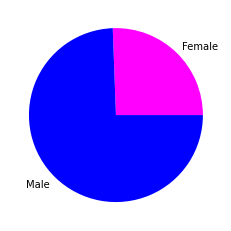

In [36]:
#Pot Pie chart comparing male & fenale observations over whole of population
female = df_gender_filtered_sv.loc[df_gender_filtered_sv['Gender'] == 'Female'].count()[0]
male = df_gender_filtered_sv.loc[df_gender_filtered_sv['Gender'] == 'Male'].count()[0]

labels = ["Female", "Male"]
colors = ["fuchsia", "blue"]

plt.pie([female, male], labels = labels, colors = colors)

plt.show()

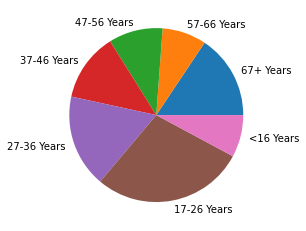

In [37]:
#Pot Pie chart comparing age category observations over whole of dataframe
CatSeven = df_genderageall.loc[df_genderageall['Age_Category'] == '67+ Years'].count()[0]
CatOne = df_genderageall.loc[df_genderageall['Age_Category'] == '57-66 Years'].count()[0]
CatTwo = df_genderageall.loc[df_genderageall['Age_Category'] == '47-56 Years'].count()[0]
CatThree = df_genderageall.loc[df_genderageall['Age_Category'] == '37-46 Years'].count()[0]
CatFour = df_genderageall.loc[df_genderageall['Age_Category'] == '27-36 Years'].count()[0]
CatFive = df_genderageall.loc[df_genderageall['Age_Category'] == '17-26 Years'].count()[0]
CatSix = df_genderageall.loc[df_genderageall['Age_Category'] == '<16 Years'].count()[0]

#'67+ Years', '57-66 Years', '47-56 Years', '37-46 Years', '27-36 Years', '17-26 Years', '<16 Years'

labels = ["67+ Years", "57-66 Years", "47-56 Years", "37-46 Years", "27-36 Years", "17-26 Years", "<16 Years"]
#colors = ["fuchsia", "blue"]

plt.pie([CatSeven, CatOne, CatTwo, CatThree, CatFour, CatFive, CatSix], labels = labels)

plt.show()

In [38]:
#Create an all gender pivot table from the data
pivot2 = pd.pivot_table(df_genderageall, 
               values='Crash_ID',
               index=['Year'],
               columns=['Age_Category'],
               aggfunc='count'
              )
pivot2

Age_Category,17-26 Years,27-36 Years,37-46 Years,47-56 Years,57-66 Years,67+ Years,<16 Years
Year,,,,,,,
1989,986,478,298,195,211,327,305
1990,805,412,222,167,169,315,241
1991,696,379,192,179,145,320,202
1992,633,363,203,155,138,284,197
1993,642,353,236,149,133,259,181
1994,588,314,226,146,147,323,183
1995,639,352,240,165,142,298,181
1996,593,331,241,170,140,302,193
1997,552,298,219,153,108,262,175


<AxesSubplot:xlabel='Year'>

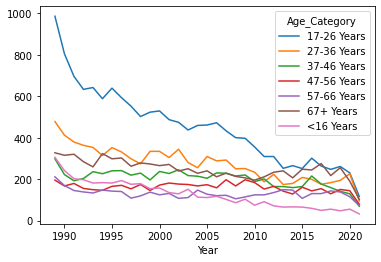

In [39]:
#Plot as line chart

pivot2.plot(kind='line')

In [40]:
#df_pivot1age.to_csv('.\\Resources\pivot1ageprop.csv', index = "False")
#df_pivot1age.head()

#Convert Pivot2 to a csv, drop all year except: 1989, 1994, 1999, 2004, 2009, 2014, 2019
pivot2.to_csv('.\\Resources\pivot2age.csv', index = "False")
pivot2.head()

Age_Category,17-26 Years,27-36 Years,37-46 Years,47-56 Years,57-66 Years,67+ Years,<16 Years
Year,,,,,,,
1989,986,478,298,195,211,327,305
1990,805,412,222,167,169,315,241
1991,696,379,192,179,145,320,202
1992,633,363,203,155,138,284,197
1993,642,353,236,149,133,259,181


In [41]:
#Drop columns =['<16 Years']
pivot2 = pivot2.drop(columns=['<16 Years'])
pivot2.head()

Age_Category,17-26 Years,27-36 Years,37-46 Years,47-56 Years,57-66 Years,67+ Years
Year,,,,,,
1989,986,478,298,195,211,327
1990,805,412,222,167,169,315
1991,696,379,192,179,145,320
1992,633,363,203,155,138,284
1993,642,353,236,149,133,259


In [42]:
#Convert Pivot2 to a csv, drop all year except: 1989, 1994, 1999, 2004, 2009, 2014, 2019
pivot2.to_csv('.\\Resources\pivot2age.csv', index = "False")
pivot2.head()

Age_Category,17-26 Years,27-36 Years,37-46 Years,47-56 Years,57-66 Years,67+ Years
Year,,,,,,
1989,986,478,298,195,211,327
1990,805,412,222,167,169,315
1991,696,379,192,179,145,320
1992,633,363,203,155,138,284
1993,642,353,236,149,133,259


In [ ]:
#Drop rows except: 1989, 1994, 1999, 2004, 2009, 2014, 2019
final_df = pivot2, index=['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai'], columns=['a1', 'a2', 'a3', 'a4', 'a5', 'a6']
final_df